In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np

# data without None Values
video_games = pd.read_csv('processed_video_games_data.csv')

In [2]:
np.random.seed(42)

In [9]:
X = video_games.drop(columns=["Global_Sales"])
y = video_games["Global_Sales"]

In [10]:
m = len(video_games)
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)


X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

In [11]:
len(X_train)

4777

## stratifying data set

In [12]:
video_games["Global_Sales_cat"] = pd.cut(video_games["Global_Sales"], 
                                         bins =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,np.inf], 
                                         labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [13]:
video_games["Global_Sales_cat"].value_counts()


Global_Sales_cat
1     1601
11    1267
2     1146
3      739
4      510
5      408
6      358
7      243
8      204
9      166
10     143
12      27
13      10
14       3
Name: count, dtype: int64

<Axes: >

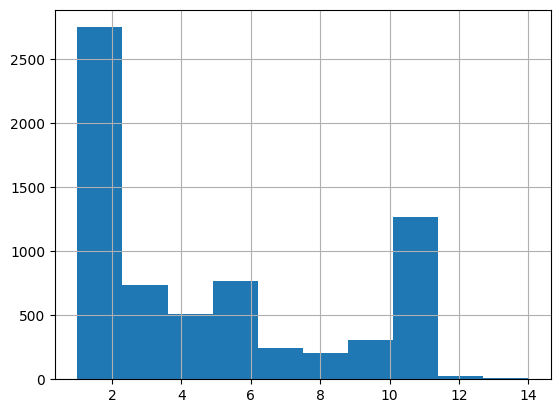

In [14]:
video_games["Global_Sales_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(video_games, video_games["Global_Sales_cat"]):
    strat_train_set = video_games.loc[train_index]
    strat_test_set = video_games.loc[test_index]

In [19]:
strat_test_set["Global_Sales_cat"].value_counts() / len(strat_test_set)


Global_Sales_cat
1     0.234432
11    0.185348
2     0.167766
3     0.108425
4     0.074725
5     0.060073
6     0.052747
7     0.035165
8     0.030037
9     0.024176
10    0.021245
12    0.003663
13    0.001465
14    0.000733
Name: count, dtype: float64

In [20]:
video_games["Global_Sales_cat"].value_counts() / len(video_games)


Global_Sales_cat
1     0.234579
11    0.185641
2     0.167912
3     0.108278
4     0.074725
5     0.059780
6     0.052454
7     0.035604
8     0.029890
9     0.024322
10    0.020952
12    0.003956
13    0.001465
14    0.000440
Name: count, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
def income_cat_proportions(data):
    return data["Global_Sales_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(video_games, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(video_games),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [25]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Global_Sales_cat,,,,,
1,0.234579,0.234432,0.237363,1.186758,-0.062461
2,0.167912,0.167766,0.153846,-8.376963,-0.087260
3,0.108278,0.108425,0.101099,-6.630582,0.135318
4,0.074725,0.074725,0.084982,13.725490,0.000000
5,0.059780,0.060073,0.054945,-8.088235,0.490196
6,0.052454,0.052747,0.057875,10.335196,0.558659
7,0.035604,0.035165,0.027106,-23.868313,-1.234568
8,0.029890,0.030037,0.029304,-1.960784,0.490196
9,0.024322,0.024176,0.030037,23.493976,-0.602410


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Global_Sales_cat", axis=1, inplace=True)